In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import cycxchg as cxc

# Cycle Decomposition
This notebook demonstrates the breakdown of a graph into polyhedron-interchangeability (`pi`) and short loop-interchangeability (`sli`) classes. This is implemented for a generic networkx graph using the `cxc.cycle_decomposition` class. This function is designed to be simple to use. This notebook is has three main components:
1. Illustrative examples of the `cycle_decomposition` object.
2. Time complexity of the `cycle_decomposition` object.
3. Outline of the algorithmic steps used to construct the `cycle_decomposition` object. These codes are not meant to be used in practice, but to give understanding of the backend of these codes.

### <ins> Example 1: Stacked Cubes <ins>
Here, we outline a graph composed of two stacked cubes shown below.

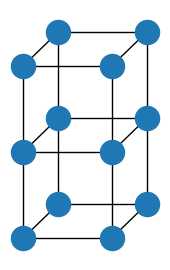

In [2]:
plt.figure(figsize=(1.5,2.5))
Gcubes = nx.grid_graph((2,3,2))
pos = {u: np.array(u[:2])+.4*np.ones(2)*u[2] for u in Gcubes}

nx.draw(Gcubes,pos)

# cycle decomposition object
cyc_dec = cxc.cycle_decomposition(Gcubes)

#### Faces
Each of the eleven square faces of this graph form its own `sli` class shown below. 

Number of relevant cycles: 11
Number of sli classes:     11


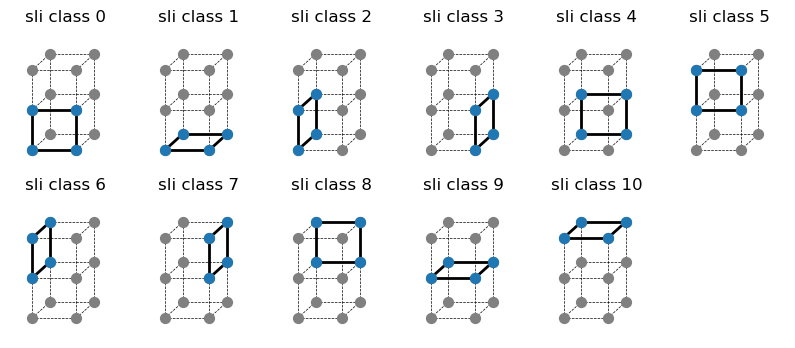

In [3]:
print('Number of relevant cycles:',cyc_dec.num_relevant_cycles)
print('Number of sli classes:    ',cyc_dec.num_sli_classes)

# show sli classes
fig,ax = plt.subplots(2,6,figsize=(10,4))
for i,sc in enumerate(cyc_dec.sli_classes):
    # build a graph from the sli classes
    Gsli = nx.from_edgelist(sc.edges())
    # visualize using the same positions as in the larger graph
    nx.draw(Gcubes,pos,node_color='gray',node_size=50,edgecolors='gray',style='--',width=.5,ax=ax[i//6,i%6]) # to get their respective positions
    nx.draw(Gsli,pos,ax=ax[i//6,i%6],node_size=50,width=2)
    ax[i//6,i%6].set_title(f'sli class {i}')
    ax[i//6,i%6].set_xlim([-.5,2])
    ax[i//6,i%6].set_ylim([-.5,3])
ax[-1,-1].axis('off');
# order: front-bottom, bottom,    bottom-left, bottom-right, bottom-back, front-top,
#        top-left,     top-right, top-back,    center,       top

#### Polyhedra
This graph has a single `pi` class with two linearly independent polyhedra. These polyhedra can be observed in the matrix $R$ used by the cycle decomposition object. These codes do not necessarily form a minimum polyhedra basis. Depending on node labels, we either sample the (i) two cubes as desired or (ii) a cube and the rectangular prism as shown below.

Number of pi classes: 1
Number of polyhedra:  2


Text(0.5, 1.0, 'R matrix')

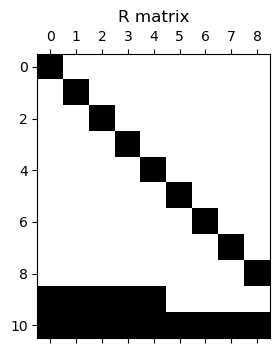

In [4]:
print('Number of pi classes:',cyc_dec.num_pi_classes)
print('Number of polyhedra: ',cyc_dec.pi_classes[0].dim_polyhedra)

plt.figure(figsize=(3,4))
cyc_dec.R_Mat.plot() # simply uses the spy function, but for the custom sparse matrix object
plt.title('R matrix')
# rows 9 and 10 -> P1 = {C0,C1,C2,C3,C4,C9} (bottom cube)
#                  P2 = {C0,C1,C2,C3,C4,C5,C6,C7,C8,C10} (rectangular prism)

#### Other properties of `pi` classes
We demonstrate other methods for a given `pi` class below

In [5]:
pc = cyc_dec.pi_classes[0]
print('Length of cycles in pi class:', pc.length)
print('Number of cycles in pi class:', pc.num_cycles)

# maximal set of cycles from pi class that can be used to make an MCB
print('\nDeterministic set of cycles from pi class for MCB (as node lists):',pc.arbitrary_sample())
print(  'Deterministic set of cycles from pi class for MCB (as edge sets): ',pc.arbitrary_sample(rep='edges'))
print(  'Deterministic set of cycles from pi class for MCB (as node lists):',pc.random_sample())

print('\nNodes in pi class:',pc.nodes()) # node labels are given by their 3d coordinates for grid_graph
print(  'Edges in pi class:',pc.edges())

# contains is implemented
print('\n[(0,0,0),(0,0,1),(0,1,1),(0,1,0)] in pi class:                ', [(0,0,0),(0,0,1),(0,1,1),(0,1,0)] in pc)                 # regular face
print(  '[(0,0,0),(0,0,1),(0,1,1),(0,2,1),(0,2,0),(0,1,0)] in pi class:', [(0,0,0),(0,0,1),(0,1,1),(0,2,1),(0,2,0),(0,1,0)] in pc) # hexagon face

Length of cycles in pi class: 4
Number of cycles in pi class: 11

Deterministic set of cycles from pi class for MCB (as node lists): [[(0, 0, 0), (0, 1, 0), (1, 1, 0), (1, 0, 0)], [(0, 0, 0), (0, 0, 1), (1, 0, 1), (1, 0, 0)], [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0)], [(1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 0)], [(0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)], [(0, 1, 0), (0, 2, 0), (1, 2, 0), (1, 1, 0)], [(0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0)], [(1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 0)], [(0, 1, 1), (0, 2, 1), (1, 2, 1), (1, 1, 1)]]
Deterministic set of cycles from pi class for MCB (as edge sets):  [{((1, 0, 0), (1, 1, 0)), ((0, 0, 0), (0, 1, 0)), ((0, 0, 0), (1, 0, 0)), ((0, 1, 0), (1, 1, 0))}, {((1, 0, 0), (1, 0, 1)), ((0, 0, 1), (1, 0, 1)), ((0, 0, 0), (0, 0, 1)), ((0, 0, 0), (1, 0, 0))}, {((0, 0, 0), (0, 1, 0)), ((0, 1, 0), (0, 1, 1)), ((0, 0, 0), (0, 0, 1)), ((0, 0, 1), (0, 1, 1))}, {((1, 0, 0), (1, 0, 1)), ((1, 0, 0), (1, 1, 0)), ((1, 0, 1), (1, 1, 1)), ((1, 1, 0), (1, 1

#### <ins> Example 2: Nested rings <ins>
Now we consider a graph composed of two large rings with nested smaller rings shown below.

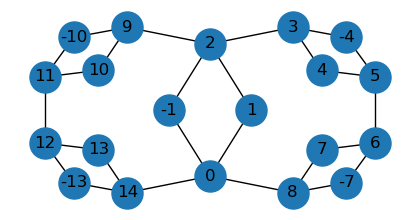

In [6]:
Grings = nx.Graph()
nx.add_cycle(Grings,[0,1,2,3,4,5,6,7,8])
nx.add_cycle(Grings,[0,-1,2,3,-4,5,6,-7,8])
nx.add_cycle(Grings,[0,1,2,9,10,11,12,13,14])
nx.add_cycle(Grings,[0,1,2,9,-10,11,12,-13,14])
pos = {0: [0,0], 1: [0.5,1], -1: [-0.5,1], 2: [0,2], 3: [1,2.25], 4:[1.35,1.6], -4: [1.65,2.1], 5:[2,1.5],
       8: [1,-.25], 7:[1.35,.4], -7: [1.65,-.1], 6:[2,.5], 9:[-1,2.25],10:[-1.35,1.6],-10:[-1.65,2.1],
       11:[-2,1.5], 14:[-1,-.25],13:[-1.35,.4],-13:[-1.65,-.1],12:[-2,.5]}

plt.figure(figsize=(4,2))
nx.draw(Grings,pos,node_size=500,with_labels=True)

cyc_dec = cxc.cycle_decomposition(Grings)

#### `sli` classes
The complexity of this graph is given by its `sli` classes. Each `pi` class reduces to a single `sli` class. The `pi` and `sli` classes are shown below

Number of pi classes:  7
Number of sli classes: 7

sli classes:
sli class 0: short_loop_class(length=4,num_cycles=1)
sli class 1: short_loop_class(length=4,num_cycles=1)
sli class 2: short_loop_class(length=4,num_cycles=1)
sli class 3: short_loop_class(length=4,num_cycles=1)
sli class 4: short_loop_class(length=4,num_cycles=1)
sli class 5: short_loop_class(length=9,num_cycles=8)
sli class 6: short_loop_class(length=9,num_cycles=8)


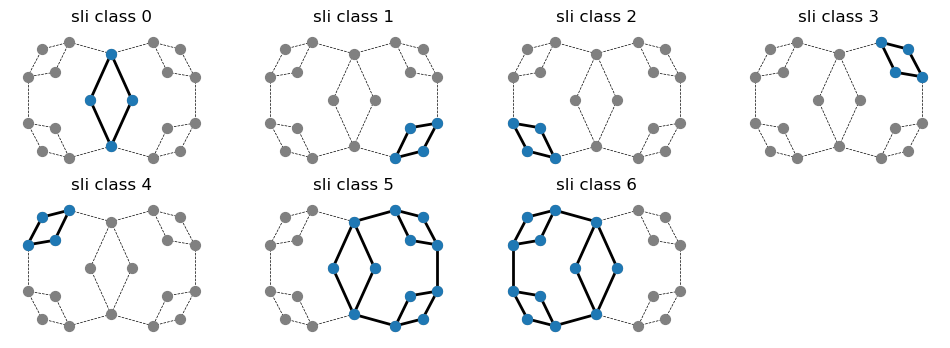

In [7]:
print('Number of pi classes: ',cyc_dec.num_pi_classes)
print('Number of sli classes:',cyc_dec.num_sli_classes)

fig,ax=plt.subplots(2,4,figsize=(12,4))
print('\nsli classes:')
for i,sc in enumerate(cyc_dec.sli_classes):
    print(f'sli class {i}: {sc}')
    Gsli = nx.from_edgelist(sc.edges())
    nx.draw(Grings,pos,node_size=50,node_color='gray',edgecolors='gray',style='--',width=.5,ax=ax[i//4,i%4])
    nx.draw(Gsli,pos,node_size=50,width=2,ax=ax[i//4,i%4])
    ax[i//4,i%4].set_title(f'sli class {i}')
ax[-1,-1].axis('off');

#### Other properties of the `cycle_decomposition` object
Some other items that can be obtained via the cycle_decomposition object are:
- The modified Vismara cycle families.
- The number of minimum cycle bases (warning: computationally expensize with `pi` classes with many polyhedra).
- Minimum cycle basis sampling (see also the notebook `random_MCB_And_twistane.ipynb`).

In [8]:
print("V'-families:")
for fam in cyc_dec.families:
    print(fam)

print('\nNumber of MCBs:',cyc_dec.num_MCB())

print('\nDeterministic MCB:                 ',cyc_dec.get_MCB())
print(  'Random MCB:                        ',cyc_dec.random_MCB())
print(  'Random MCB with path intersections:',cyc_dec.random_MCB(merge_MCB=True)[0])

V'-families:
RelCyc_Family(e0=(-1, 2), e1=(0, 1), length=4, num_cycles=1)
RelCyc_Family(e0=(-7, 6), e1=(8, 7), length=4, num_cycles=1)
RelCyc_Family(e0=(-13, 12), e1=(14, 13), length=4, num_cycles=1)
RelCyc_Family(e0=(-4, 5), e1=(3, 4), length=4, num_cycles=1)
RelCyc_Family(e0=(-10, 11), e1=(9, 10), length=4, num_cycles=1)
RelCyc_Family(e0=(4, 5), x=0, length=9, num_cycles=4)
RelCyc_Family(e0=(-4, 5), x=0, length=9, num_cycles=4)
RelCyc_Family(e0=(10, 11), x=0, length=9, num_cycles=4)
RelCyc_Family(e0=(-10, 11), x=0, length=9, num_cycles=4)

Number of MCBs: 64.0

Deterministic MCB:                  [[0, -1, 2, 1], [8, -7, 6, 7], [14, -13, 12, 13], [3, -4, 5, 4], [9, -10, 11, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 9, 10, 11, 12, 13, 14]]
Random MCB:                         [[0, -1, 2, 1], [8, -7, 6, 7], [14, -13, 12, 13], [3, -4, 5, 4], [9, -10, 11, 10], [0, -1, 2, 3, 4, 5, 6, 7, 8], [0, -1, 2, 9, -10, 11, 12, -13, 14]]
Random MCB with path intersections: [[0, -1, 2, 1], [8, -7, 6,

#### Other properties of `sli` classes
We demonstrate other methods for a given `sli` class below.

In [9]:
sc = cyc_dec.sli_classes[-1]
print('Length of cycles in sli class:',sc.length)
print('Number of cycles in sli class:',sc.num_cycles)

print('\nDeterministic cycle in sli class (as node list):',sc.arbitrary_cycle())
# rep input can be used to change the representation of cycles. This is only robustly implemented for the 'nodes' format.
print(  'Deterministic cycle in sli class (as edge set): ',sc.arbitrary_cycle(rep='edges'))
print(  'Random cycle in sli class (as node list):       ',sc.random_cycle())

print('\nNodes in sli class:',sc.nodes())
print(  'Edges in sli class:',sc.edges())

# contains is also implemented
print('\n[0,1,2,-1] in sli class:               ', [0,1,2,-1] in sc)
print(  '[0,-1,2,9,10,11,12,13,14] in sli class:', [0,-1,2,9,10,11,12,13,14] in sc)

Length of cycles in sli class: 9
Number of cycles in sli class: 8

Deterministic cycle in sli class (as node list): [0, 1, 2, 9, 10, 11, 12, 13, 14]
Deterministic cycle in sli class (as edge set):  {(0, 1), (9, 10), (13, 14), (1, 2), (10, 11), (12, 13), (11, 12), (2, 9), (0, 14)}
Random cycle in sli class (as node list):        [0, -1, 2, 9, -10, 11, 12, 13, 14]

Nodes in sli class: {0, 1, 2, 9, 10, 11, 12, 13, 14, -13, -10, -1}
Edges in sli class: {(0, 1), (9, 10), (2, -1), (1, 2), (10, 11), (9, -10), (11, -10), (12, 13), (14, -13), (12, -13), (0, 14), (13, 14), (11, 12), (2, 9), (0, -1)}

[0,1,2,-1] in sli class:                False
[0,-1,2,9,10,11,12,13,14] in sli class: True


# Time complexity
By using sparse operations, the time complexity to compute the `cycle_decomposition` object typically grows as $O(m^2)$ where $m$ is the number of nodes. When the graph is sparse as $m=O(n)$ where $n$ is the number of nodes the complexity is $O(n^2)$ We give three examples of this.

#### Complete graph
As an example of the complexity for dense graphs. Here $m=O(n^2)$, so we expect in the worst case $O(n^4)$.

In [10]:
import timeit

Text(0, 0.5, 'time (s)')

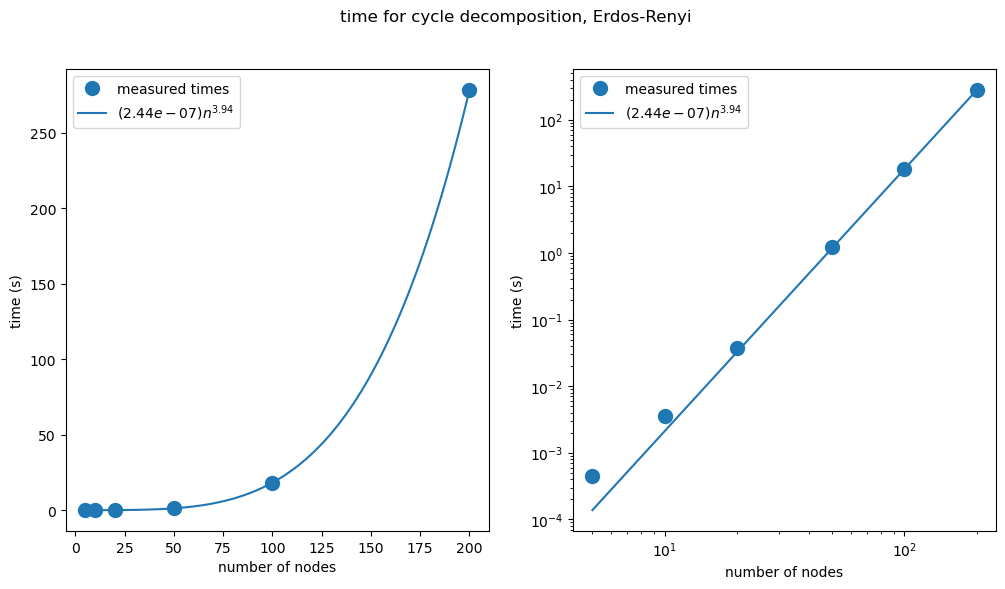

In [ ]:
# sample times
n_list = np.array([5,10,20,50,100,200])
times = np.zeros_like(n_list,dtype=float)
for i,n in enumerate(n_list):
    trials = 200//n
    G = nx.complete_graph(n)
    times[i] = timeit.timeit(lambda: cxc.cycle_decomposition(G),number=trials)/trials

# power law fit
weights = n_list # weight larger times higher
A = np.vstack((weights*np.ones_like(n_list),weights*np.log(n_list))).T
logC,p = np.linalg.lstsq(A,weights*np.log(times))[0]

fig,ax=plt.subplots(1,2,figsize=(12,6))
fig.suptitle('time for cycle decomposition, Erdos-Renyi')
# display in normal scale to show growth
ax[0].plot(n_list,times,'.C0',ms=20)
xvals = np.linspace(n_list[0],n_list[-1],100)
ax[0].plot(xvals, np.exp(logC)*xvals**p, 'C0')
ax[0].legend(['measured times',fr'$({np.exp(logC):.2e}) n^{{{p:4.2f}}}$'])
ax[0].set_xlabel('number of nodes')
ax[0].set_ylabel('time (s)')
# display in log scale to show growth
ax[1].plot(n_list,times,'.C0',ms=20)
ax[1].plot(xvals, np.exp(logC)*xvals**p, 'C0')
ax[1].legend(['measured times',fr'$({np.exp(logC):.2e}) n^{{{p:4.2f}}}$'])
ax[1].set_xscale('log')
ax[1].set_xlabel('number of nodes')
ax[1].set_yscale('log')
ax[1].set_ylabel('time (s)')

#### Erdos-Renyi graph
As an example of a generic sparse graph. Cycles in Erdos-Renyi grow in length with graph size. Because of this the matrix $\mathbf{R_0}$ of fundamental cycle basis vectors is not as sparse, and the time complexity to compute the cycle decomposition grows faster than $O(m^2)=O(n^2)$. 

Text(0, 0.5, 'time (s)')

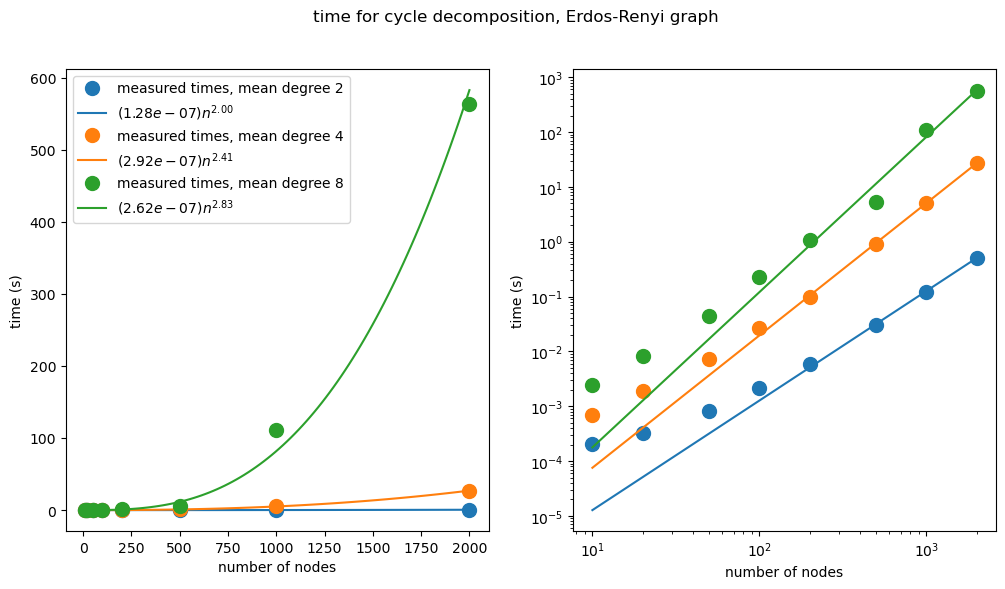

In [46]:
# sample times
n_list = np.array([10,20,50,100,200,500,1000,2000])
fig,ax=plt.subplots(1,2,figsize=(12,6))
fig.suptitle('time for cycle decomposition, Erdos-Renyi graph')

for idx,kmean in enumerate([2,4,8]):
    times = np.zeros_like(n_list,dtype=float)
    for i,n in enumerate(n_list):
        trials = 40_000//n//kmean
        times[i] = timeit.timeit(lambda: cxc.cycle_decomposition(nx.erdos_renyi_graph(n,kmean/(n-1))),number=trials)/trials
    
    # power law fit
    weights = n_list # weight larger graphs highter, reduces small graph effects
    A = np.vstack((weights*np.ones_like(n_list),weights*np.log(n_list))).T
    logC,p = np.linalg.lstsq(A,weights*np.log(times))[0]

    ax[0].plot(n_list,times,f'.C{idx}',ms=20,label=f'measured times, mean degree {kmean}')
    xvals = np.linspace(n_list[0],n_list[-1],100)
    ax[0].plot(xvals, np.exp(logC)*xvals**p, f'C{idx}', label=fr'$({np.exp(logC):.2e}) n^{{{p:4.2f}}}$')
    ax[1].plot(n_list,times,f'.C{idx}',ms=20)
    ax[1].plot(xvals, np.exp(logC)*xvals**p,f'C{idx}')

# display in normal scale to show growth
ax[0].legend()
ax[0].set_xlabel('number of nodes')
ax[0].set_ylabel('time (s)')
# loglog scale to show accuracy
ax[1].set_xscale('log')
ax[1].set_xlabel('number of nodes')
ax[1].set_yscale('log')
ax[1].set_ylabel('time (s)')

#### Random geometric graphs
These graphs are spatial and sparse. Because of this the time complexity to compute their cycle decomposition is roughly $O(n^2)$.

Text(0, 0.5, 'time (s)')

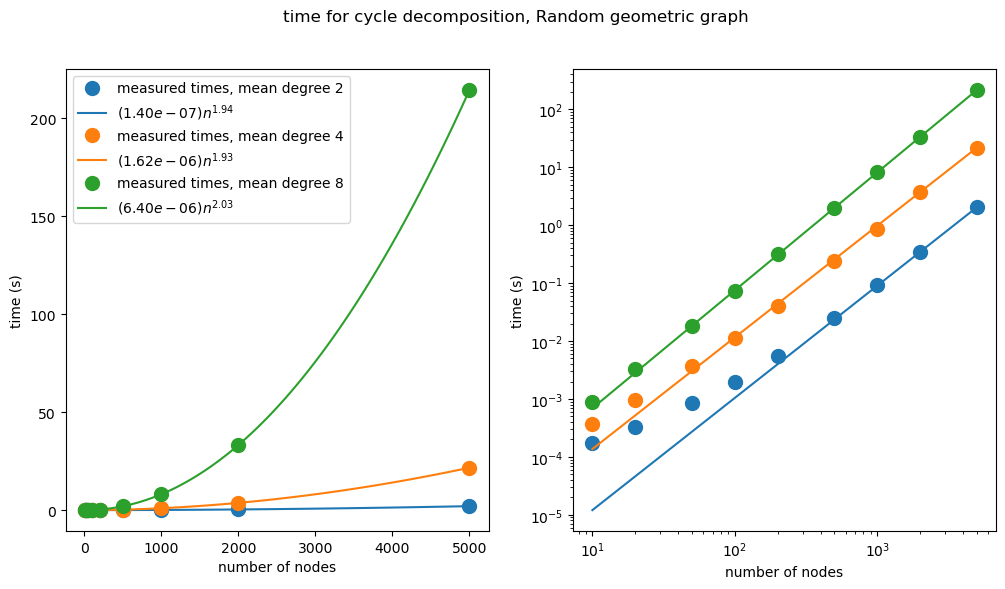

In [ ]:
# sample times
n_list = np.array([10,20,50,100,200,500,1000,2000,5000])
fig,ax=plt.subplots(1,2,figsize=(12,6))
fig.suptitle('time for cycle decomposition, Random geometric graph')

for idx,kmean in enumerate([2,4,8]):
    times = np.zeros_like(n_list,dtype=float)
    for i,n in enumerate(n_list):
        trials = 40_000//n//kmean
        # for _ in range(trials):
        #     G = nx.random_geometric_graph(n,np.sqrt(kmean/(n-1)/np.pi))
        times[i] = timeit.timeit(lambda: cxc.cycle_decomposition(nx.random_geometric_graph(n,np.sqrt(kmean/(n-1)/np.pi))),number=trials)/trials
        # times[i] /= trials
    
    # power law fit
    weights = n_list # weight larger times higher, there are small graph effects
    A = np.vstack((weights*np.ones_like(n_list),weights*np.log(n_list))).T
    logC,p = np.linalg.lstsq(A,weights*np.log(times))[0]

    ax[0].plot(n_list,times,f'.C{idx}',ms=20,label=f'measured times, mean degree {kmean}')
    xvals = np.linspace(n_list[0],n_list[-1],100)
    ax[0].plot(xvals, np.exp(logC)*xvals**p, f'C{idx}', label=fr'$({np.exp(logC):.2e}) n^{{{p:4.2f}}}$')
    ax[1].plot(n_list,times,f'.C{idx}',ms=20)
    ax[1].plot(xvals, np.exp(logC)*xvals**p,f'C{idx}')

# display in normal scale to show growth
ax[0].legend()
ax[0].set_xlabel('number of nodes')
ax[0].set_ylabel('time (s)')
# loglog scale to show accuracy
ax[1].set_xscale('log')
ax[1].set_xlabel('number of nodes')
ax[1].set_yscale('log')
ax[1].set_ylabel('time (s)')

# Algorithmic overview
For the graph shown below we outline the steps used to group the cycle families into `pi` and `sli` classes. The red edges in this graph are used to construct a fundamental cycle basis.

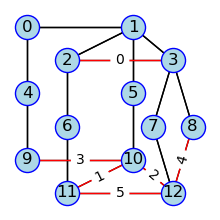

In [18]:
G = nx.Graph()

G.add_edges_from([[0,1],[1,2],[1,3],[2,3],
                  [0,4],[1,5],[2,6],[3,7],[3,8],
                  [4,9],[5,10],[6,11],[7,12],[8,12],
                  [9,10],[10,11],[10,12],[11,12]])
coords = {0:[0,5],1:[2,5],2:[.75,4],3:[2.75,4],
          4:[0,3],5:[2,3],6:[.75,2],7:[2.375,2],8:[3.125,2],
          9:[0,1],10:[2,1],11:[.75,0],12:[2.75,0]}

# Fundamental cycle basis
FCB = cxc.Fundamental_Cycle_Basis(G)
FCB.edges = [(2,3),(10,11),(10,12),(9,10),(8,12),(11,12)]
for i,(u,v) in enumerate(FCB.edges):
    FCB.edge2idx[u,v] = i
    FCB.edge2idx[v,u] = i
colors = ['r' if e in FCB.edge2idx else 'k' for e in G.edges]

plt.figure(figsize=(2,2))

nx.draw(G,coords,with_labels=True,node_color='lightblue',edgecolors='blue')

nx.draw_networkx_edges(G,coords,edge_color=colors)
nx.draw_networkx_edge_labels(G,coords,edge_labels=FCB.edge2idx);

The cycle families of this graph are listed and visualized below. This uses the function `cxc._Edge_Families`. In practice, this function is not called directly, and it is instead used as a helper function for the `cxc.cycle_decomposition` class.

family 0: RelCyc_Family(e0=(2, 3), x=1, length=3, num_cycles=1)
family 1: RelCyc_Family(e0=(11, 12), x=10, length=3, num_cycles=1)
family 2: RelCyc_Family(e0=(8, 12), e1=(3, 7), length=4, num_cycles=1)
family 3: RelCyc_Family(e0=(10, 11), e1=(1, 2), length=6, num_cycles=1)
family 4: RelCyc_Family(e0=(10, 12), e1=(1, 3), length=6, num_cycles=1)
family 5: RelCyc_Family(e0=(9, 10), e1=(0, 1), length=6, num_cycles=1)
family 6: RelCyc_Family(e0=(8, 12), e1=(1, 5), length=6, num_cycles=1)
family 7: RelCyc_Family(e0=(11, 12), e1=(2, 3), length=6, num_cycles=2)
family 8: RelCyc_Family(e0=(8, 12), e1=(0, 4), length=8, num_cycles=1)


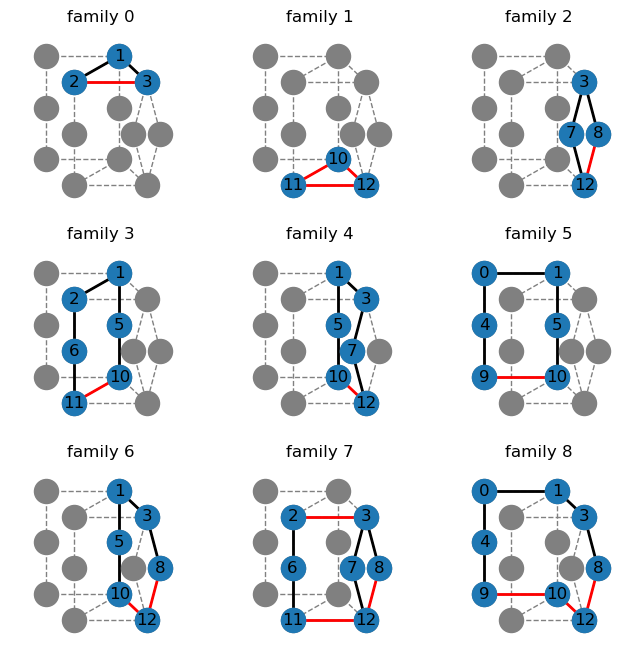

In [61]:
nu = G.number_of_edges()-G.number_of_nodes()+1
node_labels = list(G)

families = []
for i in range(nu):
    families.extend(list(cxc._Edge_Families(G,i,FCB,node_labels=node_labels)))
families = sorted(families,key=lambda x: x.length)
# print the families
for i,fam in enumerate(families):
    print(f'family {i}: {fam}')
len(families),nu

fig,ax = plt.subplots(3,3,figsize=(8,8))
for i,fam in enumerate(families):
    Gfam = nx.from_edgelist(fam.edges())
    nx.draw(G,coords,node_color='gray',edge_color='gray',width=1,style='dashed',ax=ax[i//3,i%3])
    nx.draw(Gfam,coords,ax=ax[i//3,i%3],with_labels=True)
    nx.draw_networkx_edges(Gfam,coords,edge_color=['r' if e in FCB.edge2idx else 'k' for e in Gfam.edges],width=2,ax=ax[i//3,i%3])
    ax[i//3,i%3].set_title(f'family {i}')
    ax[i//3,i%3].set_xlim([-1,4])
    ax[i//3,i%3].set_ylim([-1,6])

The breakdown of the representative cycles $C_i$ from each family as fundamental cycle basis vectors is shown below.

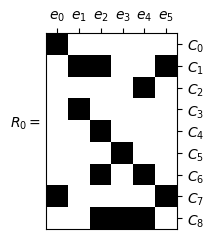

In [62]:
R0 = np.zeros((len(families),nu),dtype=int)
for i,fam in enumerate(families):
    for j in fam.arbitrary_cycle(rep='FCB'):
        R0[i,j]=1
fig = plt.figure()
fig.set_figheight(2.5)
plt.spy(R0)
plt.tick_params(bottom=False,right=True,labelright=True,left=False,labelleft=False)

plt.xticks(range(nu),[fr'$e_{i}$' for i in range(nu)])
plt.yticks(range(len(families)),[fr'$C_{{{i}}}$' for i in range(len(families))])
plt.ylabel(r'${R_0}=$', rotation='horizontal', labelpad=15)
plt.tight_layout()

The representation of these cycles as fundamental cycle basis vectors is as follows.

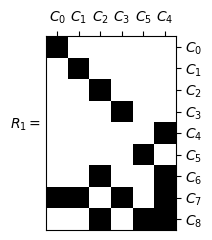

In [63]:
# compute minimum cycle basis
# see Kavitha et al. (2009)
W = np.eye(nu) # to elementary vectors
MCB_idxs = []
MCB = []
for i in range(nu):
    Si = W[:,i]
    aux = (R0@Si)%2
    idx = np.nonzero(aux)[0][0] # optimizer is first row <C,Si>=1
    MCB_idxs.append(idx)
    # update future witness vectors
    cyc = R0[idx]
    MCB.append(cyc)
    aux2 = (cyc@W[:,(i+1):])%2
    for j in np.nonzero(aux2)[0]: # vectors Sj with <C,Sj>=1 for j>i
        W[:,i+j+1]=(W[:,i+j+1]+W[:,i])%2

# Change R0 to R1 using updated witness vectors (Section 4.3)
for j in range(nu-1,0,-1):
    for k in range(j):
        if (MCB[j]@W[:,k])%2:
            W[:,k] = (W[:,k]+W[:,j])%2
R1=(R0@W)%2

# sort MCB by length
col_order = np.array(sorted(range(nu),key=lambda i:families[MCB_idxs[i]].length))
R1 = R1[:,col_order]
MCB_idxs = [MCB_idxs[i] for i in col_order]

fig = plt.figure()
fig.set_figheight(2.5)
plt.spy(R1)
plt.tick_params(bottom=False,right=True,labelright=True,left=False,labelleft=False)
plt.xticks(range(nu),[fr'$C_{i}$' for i in MCB_idxs])
plt.yticks(range(len(families)),[fr'$C_{{{i}}}$' for i in range(len(families))])
plt.ylabel(r'${R_1}=$', rotation='horizontal', labelpad=15)
plt.tight_layout()

We then keep the cycles that only have equal length or shorter cycles in their expansion

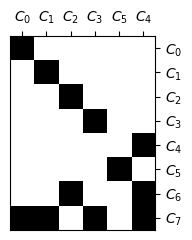

In [64]:
fam_lengths = np.array([fam.length for fam in families])
max_length = np.zeros_like(fam_lengths)
for i in range(nu):
    # go through columns of R1 left-to-right to increase max lengths in the decomposition
    max_length[np.nonzero(R1[:,i])] = families[MCB_idxs[i]].length
keep_idxs = max_length==fam_lengths
# remove invalid rows, which is just C8
R = R1[keep_idxs]
rel_families = [fam for i,fam in enumerate(families) if keep_idxs[i]]

fig = plt.figure()
fig.set_figheight(2.5)
plt.spy(R)
plt.tick_params(bottom=False,right=True,labelright=True,left=False,labelleft=False)
plt.xticks(range(nu),[fr'$C_{i}$' for i in MCB_idxs])
plt.yticks(range(len(rel_families)),[fr'$C_{{{i}}}$' for i in range(len(rel_families))])
plt.tight_layout()

The `pi` classes are computed by traversing each block of cycles of equal length joining row and column cycles with an entry 1 to the same class.

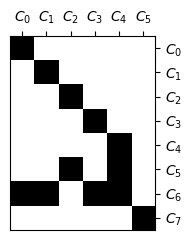

In [65]:
pi_classes = []            
# spanning tree over a bipartite graph split by nodes in and outside MCB
observed = np.zeros(len(rel_families),dtype=bool)
fam2pi   = np.zeros(len(rel_families),dtype=int)
for j in range(nu):
    # construct pi class containing jth MCB cycle
    if observed[MCB_idxs[j]]: continue 
    # two items for each pi class, [MCB cycles, and # Families in pi class]
    pi_classes.append([[j],1])
    queue = [j]
    observed[MCB_idxs[j]] = True
    fam2pi[MCB_idxs[j]]=j
    while len(queue)>0:
        queue2 = []
        # search a column (in MCB to outside MCB, i.e., cycles C with given B in their decomposition)
        for col in queue:
            for row in np.nonzero(R[:,col])[0]:
                if not observed[row]:
                    # want cycles in the same block of equal length
                    if rel_families[row].length == rel_families[MCB_idxs[col]].length:  
                        observed[row]=True
                        fam2pi[row]=j
                        queue2.append(row)
        pi_classes[-1][1]+=len(queue2)
        # search a row (outside MCB to MCB, i.e., cycles B in the decomposition of given cycle C)
        queue=[]
        for row in queue2:
            for col in np.nonzero(R[row,:])[0]:
                if not observed[MCB_idxs[col]]:
                    # want equal length cycles
                    if rel_families[row].length == rel_families[MCB_idxs[col]].length: 
                        observed[MCB_idxs[col]]=True
                        fam2pi[MCB_idxs[col]]=j
                        queue.append(col)
        pi_classes[-1][0].extend(queue)
        pi_classes[-1][1]+=len(queue)
# pointer for the start of the block in R_Mat for each pi class
# as pairs for the row and column in R_Mat
pi_ptrs = np.vstack(( np.cumsum([0]+[pc[1] for pc in pi_classes]),
                        np.cumsum([0]+[len(pc[0]) for pc in pi_classes]) ), dtype=int).T
# sort R_Mat so that pi classes form consecutive columns
colOrder = sum([pc[0] for pc in pi_classes],start=[])
aux = R[:,colOrder]
for i in range(nu): MCB_idxs[i] = colOrder[MCB_idxs[i]]
# sort rows by (a) pi class (b) number of equal length cycles in row and (b) right to left lexicographic order
def aux_f(row):
    # concatenate a,b,c and use lexicographic sort of lists to do the above sort
    right2left = [col for col in np.nonzero(aux[row])[0][::-1] \
                  if rel_families[row].length == rel_families[MCB_idxs[col]].length]
    return [fam2pi[row], len(right2left)] + right2left
rowOrder = sorted(range(np.shape(aux)[0]), key = aux_f)
aux = aux[rowOrder] # sort rows
rel_families = [rel_families[rowOrder[i]] for i in range(np.shape(R)[0])] # sort relevant cycle families
R= aux

fig = plt.figure()
fig.set_figheight(2.5)
plt.spy(R)
plt.tick_params(bottom=False,right=True,labelright=True,left=False,labelleft=False)
plt.xticks(range(nu),[fr'$C_{i}$' for i in MCB_idxs])
plt.yticks(range(len(rel_families)),[fr'$C_{{{i}}}$' for i in range(len(rel_families))])
plt.tight_layout()

Consecutive rows that are equal up to shorter cycles belong to the same `sli` class. These are removed to compute the final matrix $R$.

cycles 4 and 5 belong to the same sli class


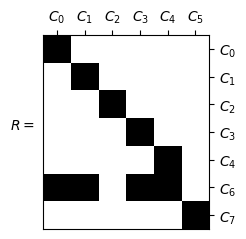

In [87]:
keep_row = np.ones(np.shape(R)[0],dtype=bool)
for row in range(1,np.shape(R)[0]):
    L1 = [a for a in np.nonzero(R[row-1])[0] if rel_families[MCB_idxs[a]].length == rel_families[row-1].length]
    L2 = [a for a in np.nonzero(R[row])[0] if rel_families[MCB_idxs[a]].length == rel_families[row].length]
    if L1 == L2:
        print(f'cycles {row-1} and {row} belong to the same sli class')
        keep_row[row]=False   
R = R[keep_row]

fig = plt.figure()
fig.set_figheight(2.5)
plt.spy(R)
plt.tick_params(bottom=False,right=True,labelright=True,left=False,labelleft=False)
plt.xticks(range(nu),[fr'$C_{i}$' for i in MCB_idxs])
plt.yticks(range(len(rel_families)-1),[fr'$C_{{{i}}}$' for i in [0,1,2,3,4,6,7]])
plt.tight_layout()
plt.ylabel(r'${R}=$', rotation='horizontal', labelpad=15);